# **MÉTHODOLOGIE COMPLÈTE - APPRENTISSAGE NON SUPERVISÉ**

## **✅ ÉTAPE 1 : CHARGER ET EXPLORER LES DONNÉES**

### Ce que tu dois faire :

In [13]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [14]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [15]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [16]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [17]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


=== INFORMATIONS GÉNÉRALES ===
Shape: (150, 4)
Colonnes: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Types: 
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

=== PREMIÈRES LIGNES ===
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

=== STATISTIQUES DESCRIPTIVES ===
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std       

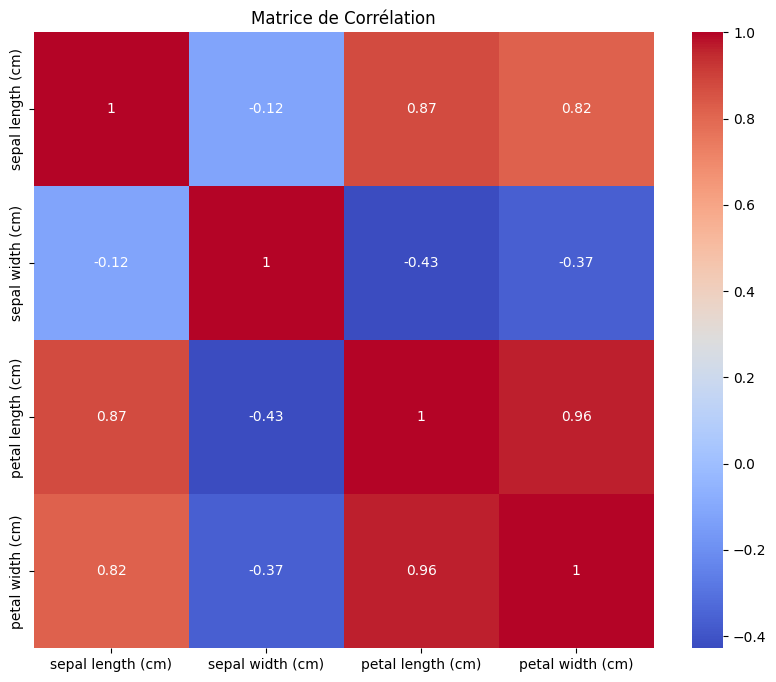

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, make_blobs
import warnings
warnings.filterwarnings('ignore')

# Charger les données (exemple avec Iris)
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# EXPLORATION OBLIGATOIRE
print("=== INFORMATIONS GÉNÉRALES ===")
print(f"Shape: {df.shape}")
print(f"Colonnes: {list(df.columns)}")
print(f"Types: \n{df.dtypes}")

print("\n=== PREMIÈRES LIGNES ===")
print(df.head())

print("\n=== STATISTIQUES DESCRIPTIVES ===")
print(df.describe())

print("\n=== VALEURS MANQUANTES ===")
print(df.isnull().sum())

print("\n=== CORRÉLATIONS ===")
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

### **Visualisations d'exploration :**

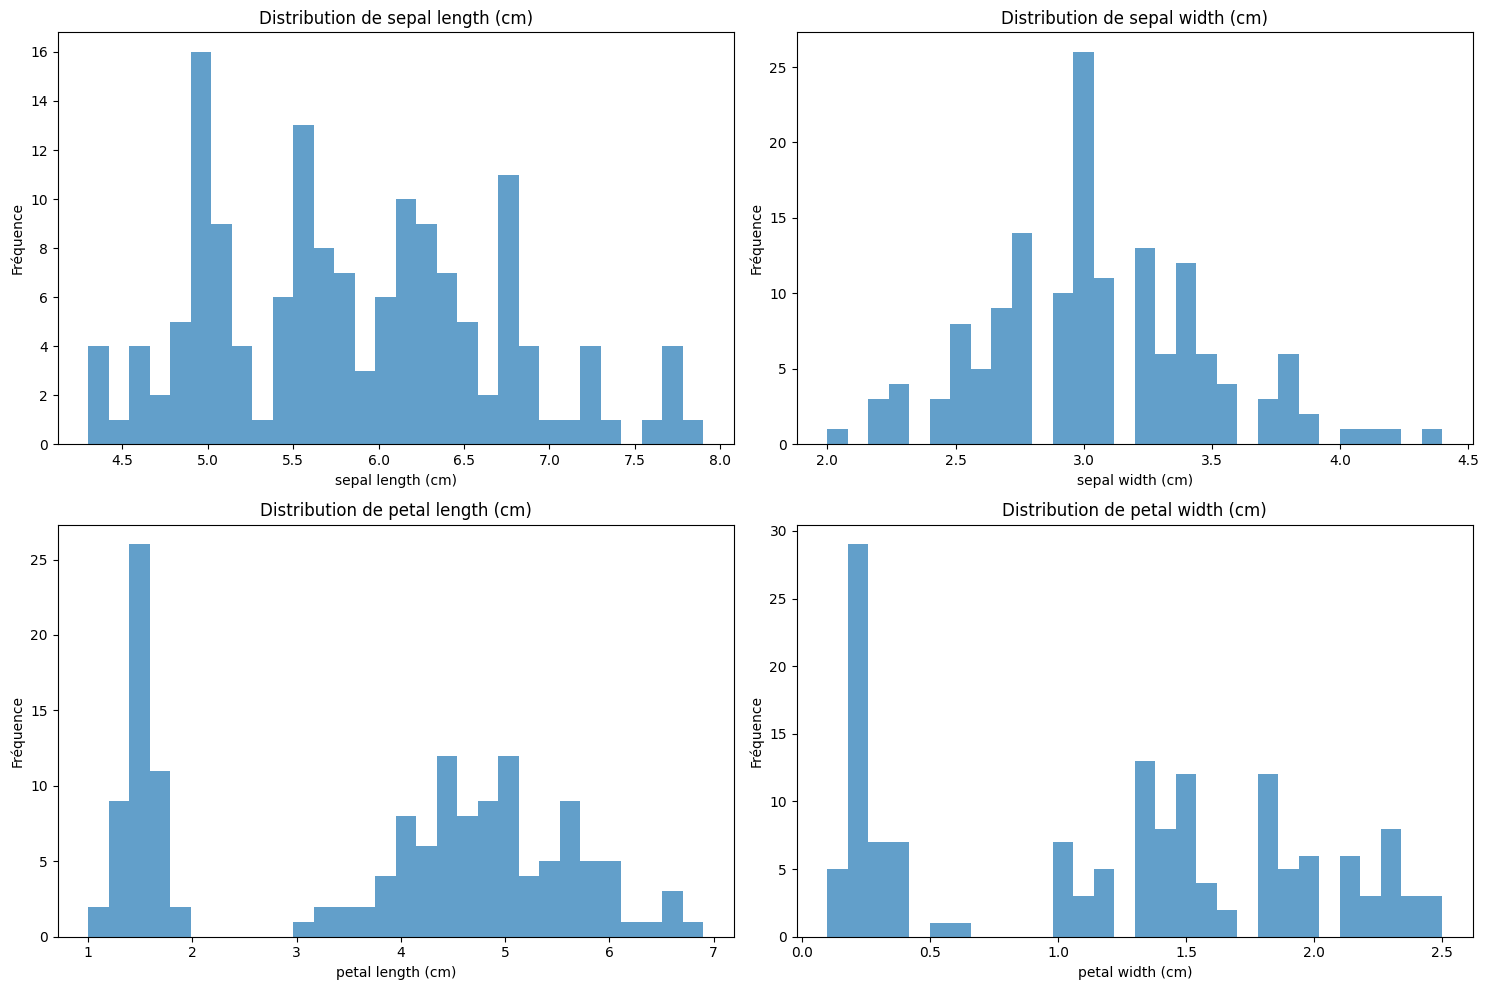

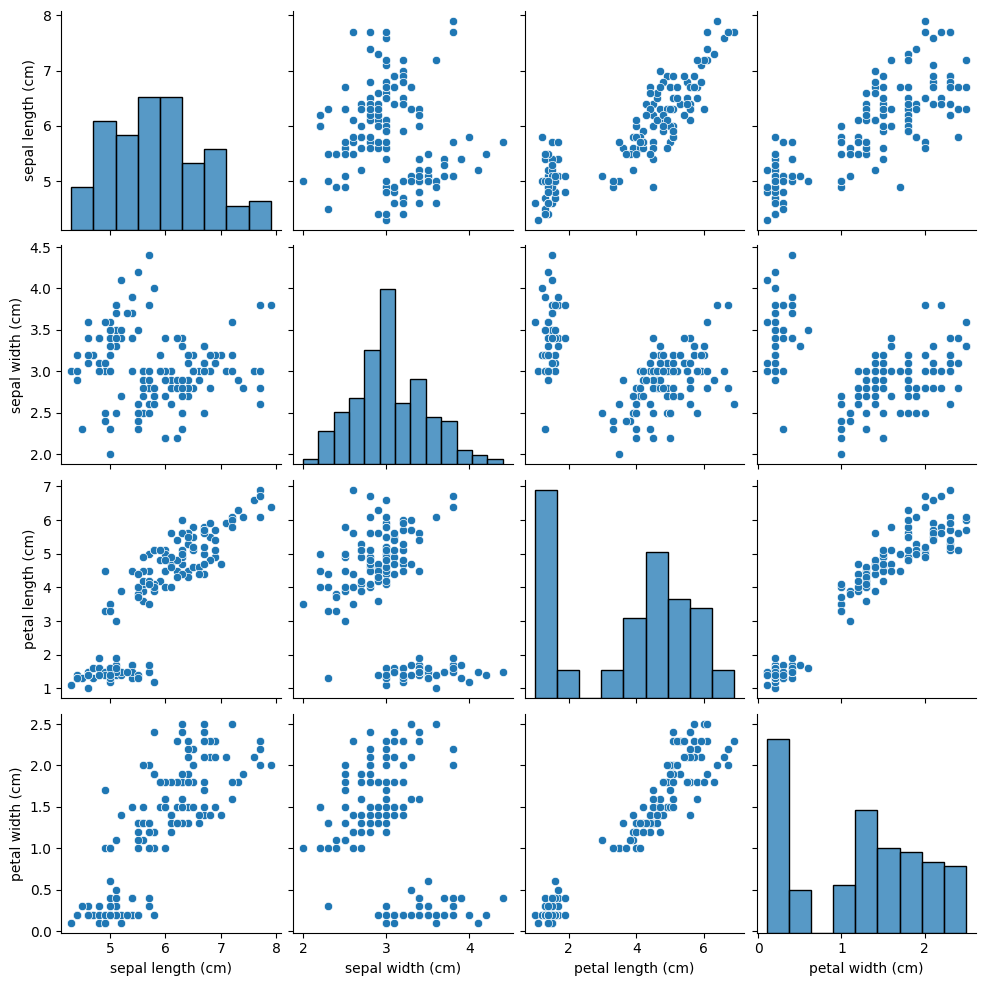

In [19]:
# Distribution des variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, col in enumerate(df.columns):
    ax = axes[i//2, i%2]
    ax.hist(df[col], bins=30, alpha=0.7)
    ax.set_title(f'Distribution de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Fréquence')

plt.tight_layout()
plt.show()

# Pairplot pour voir les relations
sns.pairplot(df)
plt.show()

## **ÉTAPE 2 : NETTOYER LES DONNÉES**

### **Gestion des valeurs manquantes :**

In [22]:
print("=== AVANT NETTOYAGE ===")
print(f"Valeurs manquantes: {df.isnull().sum().sum()}")
print(f"Shape: {df.shape}")

# Stratégies pour les NaN
if df.isnull().sum().sum() > 0:
    # Option 1: Supprimer les lignes avec NaN
    df_clean = df.dropna()
    
    # Option 2: Imputation par la moyenne (variables numériques)
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='mean')
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    
    # Option 3: Imputation par la médiane (plus robuste aux outliers)
    imputer_median = SimpleImputer(strategy='median')
    df_median = pd.DataFrame(imputer_median.fit_transform(df), columns=df.columns)

print("\n=== APRÈS NETTOYAGE ===")
print(f"Valeurs manquantes: {df.isnull().sum().sum()}")

=== AVANT NETTOYAGE ===
Valeurs manquantes: 0
Shape: (150, 4)

=== APRÈS NETTOYAGE ===
Valeurs manquantes: 0


### **Détection et gestion des outliers :**

Outliers détectés (Z-score): 1


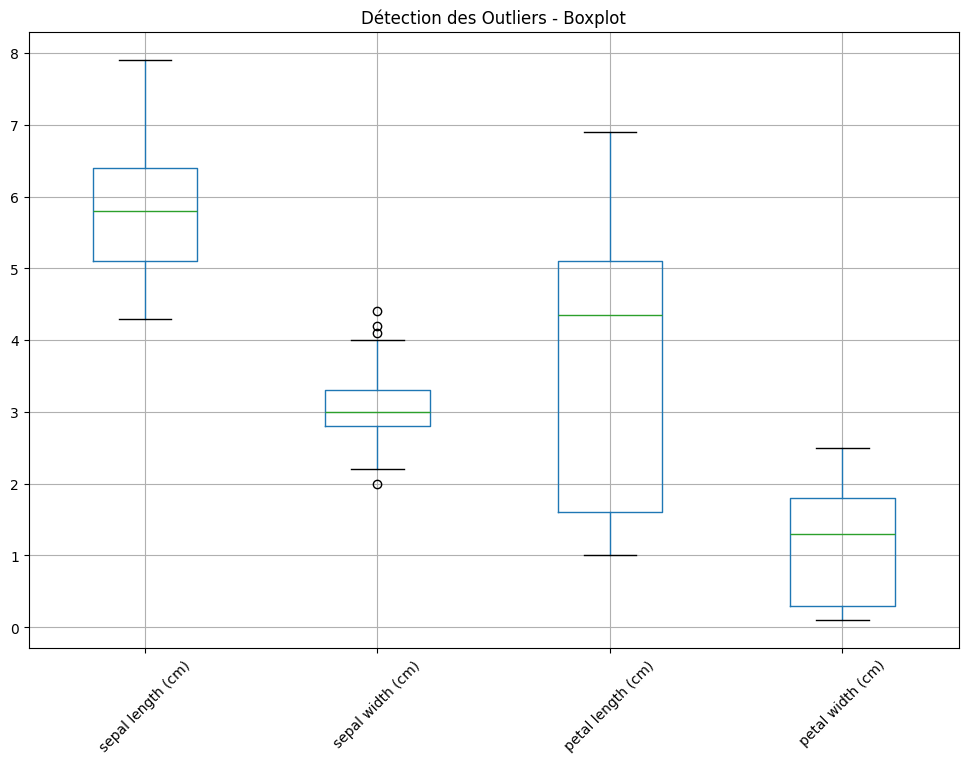

In [23]:
# Méthode 1: Z-Score (valeurs > 3 écarts-types)
from scipy import stats
z_scores = np.abs(stats.zscore(df))
outliers_zscore = (z_scores > 3).any(axis=1)
print(f"Outliers détectés (Z-score): {outliers_zscore.sum()}")

# Méthode 2: IQR (Interquartile Range)
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df[column] < lower_bound) | (df[column] > upper_bound)

# Appliquer à toutes les colonnes
outliers_iqr = pd.DataFrame()
for col in df.columns:
    outliers_iqr[col] = detect_outliers_iqr(df, col)

# Visualiser les outliers
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title('Détection des Outliers - Boxplot')
plt.xticks(rotation=45)
plt.show()

# Décision: garder ou supprimer les outliers
# Pour l'apprentissage non supervisé, souvent on les garde
df_final = df.copy()

## **ÉTAPE 3 : CHOISIR L'ALGORITHME ET EXPLIQUER POURQUOI**

### **Framework de décision :**

In [24]:
def choisir_algorithme(data_info):
    """
    Guide pour choisir l'algorithme d'apprentissage non supervisé
    """
    print("=== ANALYSE POUR CHOIX ALGORITHME ===")
    
    # Analyser les données
    n_samples, n_features = data_info['shape']
    has_labels = data_info.get('has_labels', False)
    data_type = data_info.get('type', 'numeric')
    
    print(f"Échantillons: {n_samples}, Caractéristiques: {n_features}")
    print(f"Type de données: {data_type}")
    
    # Règles de décision
    if data_info['objective'] == 'clustering':
        if n_samples < 1000 and n_features < 10:
            recommendation = "K-Means ou Clustering Hiérarchique"
            reason = "Dataset de taille modérée, formes sphériques probables"
        elif 'noise_expected' in data_info and data_info['noise_expected']:
            recommendation = "DBSCAN"
            reason = "Capable de gérer le bruit et formes arbitraires"
        else:
            recommendation = "K-Means"
            reason = "Efficace et scalable pour grandes données"
    
    elif data_info['objective'] == 'dimensionality_reduction':
        if n_features > 50:
            recommendation = "PCA puis t-SNE"
            reason = "PCA pour réduction initiale, t-SNE pour visualisation"
        else:
            recommendation = "PCA"
            reason = "Préservation de la variance maximale"
    
    elif data_info['objective'] == 'anomaly_detection':
        recommendation = "Isolation Forest"
        reason = "Efficace sans hypothèses sur distribution normale"
    
    print(f"\n🎯 RECOMMANDATION: {recommendation}")
    print(f"📝 JUSTIFICATION: {reason}")
    
    return recommendation

# Exemple d'usage
data_info = {
    'shape': df.shape,
    'objective': 'clustering',  # ou 'dimensionality_reduction', 'anomaly_detection'
    'type': 'numeric',
    'noise_expected': False
}

algorithme_choisi = choisir_algorithme(data_info)

=== ANALYSE POUR CHOIX ALGORITHME ===
Échantillons: 150, Caractéristiques: 4
Type de données: numeric

🎯 RECOMMANDATION: K-Means ou Clustering Hiérarchique
📝 JUSTIFICATION: Dataset de taille modérée, formes sphériques probables


## **ÉTAPE 4 : FORMULE MATHÉMATIQUE PRINCIPALE**

### **Exemple avec K-Means :**

In [25]:
def expliquer_formule_kmeans():
    print("=== FORMULE MATHÉMATIQUE K-MEANS ===")
    print()
    print("🎯 OBJECTIF: Minimiser la somme des carrés intra-cluster (WCSS)")
    print()
    print("📐 FORMULE PRINCIPALE:")
    print("J = Σ(i=1 to k) Σ(x∈Ci) ||x - μi||²")
    print()
    print("Où:")
    print("• J = Fonction de coût à minimiser")
    print("• k = Nombre de clusters")
    print("• Ci = Cluster i")
    print("• x = Point de données")
    print("• μi = Centroïde du cluster i")
    print("• ||x - μi||² = Distance euclidienne au carré")
    print()
    print("🔄 ALGORITHME:")
    print("1. Initialiser k centroïdes aléatoirement")
    print("2. Assigner chaque point au centroïde le plus proche")
    print("3. Recalculer les centroïdes: μi = (1/|Ci|) Σ(x∈Ci) x")
    print("4. Répéter 2-3 jusqu'à convergence")
    print()
    print("📊 DISTANCE EUCLIDIENNE:")
    print("d(x, μ) = √(Σ(j=1 to n) (xj - μj)²)")

expliquer_formule_kmeans()

=== FORMULE MATHÉMATIQUE K-MEANS ===

🎯 OBJECTIF: Minimiser la somme des carrés intra-cluster (WCSS)

📐 FORMULE PRINCIPALE:
J = Σ(i=1 to k) Σ(x∈Ci) ||x - μi||²

Où:
• J = Fonction de coût à minimiser
• k = Nombre de clusters
• Ci = Cluster i
• x = Point de données
• μi = Centroïde du cluster i
• ||x - μi||² = Distance euclidienne au carré

🔄 ALGORITHME:
1. Initialiser k centroïdes aléatoirement
2. Assigner chaque point au centroïde le plus proche
3. Recalculer les centroïdes: μi = (1/|Ci|) Σ(x∈Ci) x
4. Répéter 2-3 jusqu'à convergence

📊 DISTANCE EUCLIDIENNE:
d(x, μ) = √(Σ(j=1 to n) (xj - μj)²)


## **Template pour autres algorithmes :**

In [30]:
def expliquer_formule_pca():
    print("=== ANALYSE EN COMPOSANTES PRINCIPALES (PCA) ===")
    print()
    print("🎯 OBJECTIF: Trouver directions de variance maximale")
    print()
    print("📐 FORMULES PRINCIPALES:")
    print("1. Matrice de covariance: C = (1/n) X^T X")
    print("2. Décomposition propre: C = V Λ V^T")
    print("3. Transformation: Y = X V")
    print()
    print("Où:")
    print("• X = Matrice de données centrées")
    print("• V = Vecteurs propres (composantes principales)")
    print("• Λ = Valeurs propres (variance expliquée)")
    print("• Y = Données transformées")

def expliquer_formule_dbscan():
    print("=== DBSCAN ===")
    print()
    print("🎯 OBJECTIF: Grouper points denses, identifier bruit")
    print()
    print("📐 CONCEPTS MATHÉMATIQUES:")
    print("1. Voisinage ε: Nε(x) = {y | d(x,y) ≤ ε}")
    print("2. Point dense: |Nε(x)| ≥ MinPts")
    print("3. Densité-accessible: chaîne de points denses")
    print()
    print("🔍 CLASSIFICATION DES POINTS:")
    print("• Core point: |Nε(x)| ≥ MinPts")
    print("• Border point: Non-core mais dans Nε d'un core")
    print("• Noise point: Ni core ni border")

## **ÉTAPE 5 : IMPLÉMENTATION PYTHON (SKLEARN)**

### **Template K-Means complet :**

=== IMPLÉMENTATION K-MEANS ===
Données standardisées: (150, 4)


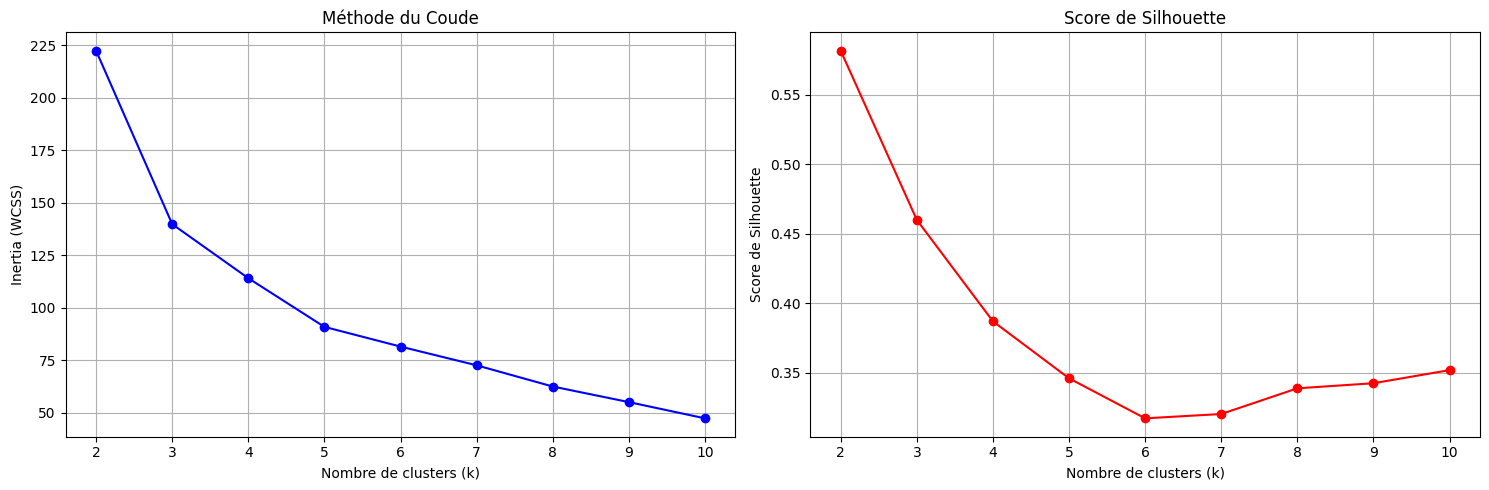

Nombre optimal de clusters: 2
Centroïdes finaux:
[[ 0.50728948 -0.42663134  0.65249366  0.62744675]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]]
Inertia finale: 222.36


In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score

def implementer_kmeans(df, n_clusters=3):
    print("=== IMPLÉMENTATION K-MEANS ===")
    
    # 1. Préparation des données
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df)
    print(f"Données standardisées: {X_scaled.shape}")
    
    # 2. Déterminer le nombre optimal de clusters (méthode du coude)
    inertias = []
    silhouette_scores = []
    K_range = range(2, 11)
    
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    
    # Visualiser la méthode du coude
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    ax1.plot(K_range, inertias, 'bo-')
    ax1.set_xlabel('Nombre de clusters (k)')
    ax1.set_ylabel('Inertia (WCSS)')
    ax1.set_title('Méthode du Coude')
    ax1.grid(True)
    
    ax2.plot(K_range, silhouette_scores, 'ro-')
    ax2.set_xlabel('Nombre de clusters (k)')
    ax2.set_ylabel('Score de Silhouette')
    ax2.set_title('Score de Silhouette')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # 3. Modèle final avec k optimal
    optimal_k = K_range[np.argmax(silhouette_scores)]
    print(f"Nombre optimal de clusters: {optimal_k}")
    
    kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    cluster_labels = kmeans_final.fit_predict(X_scaled)
    
    # 4. Ajouter les labels au DataFrame
    df_result = df.copy()
    df_result['Cluster'] = cluster_labels
    
    print(f"Centroïdes finaux:\n{kmeans_final.cluster_centers_}")
    print(f"Inertia finale: {kmeans_final.inertia_:.2f}")
    
    return df_result, kmeans_final, X_scaled

# Exécuter
df_clustered, model, X_scaled = implementer_kmeans(df)

### **Template PCA :**

=== IMPLÉMENTATION PCA ===
Composantes nécessaires pour 95.0% variance: 2


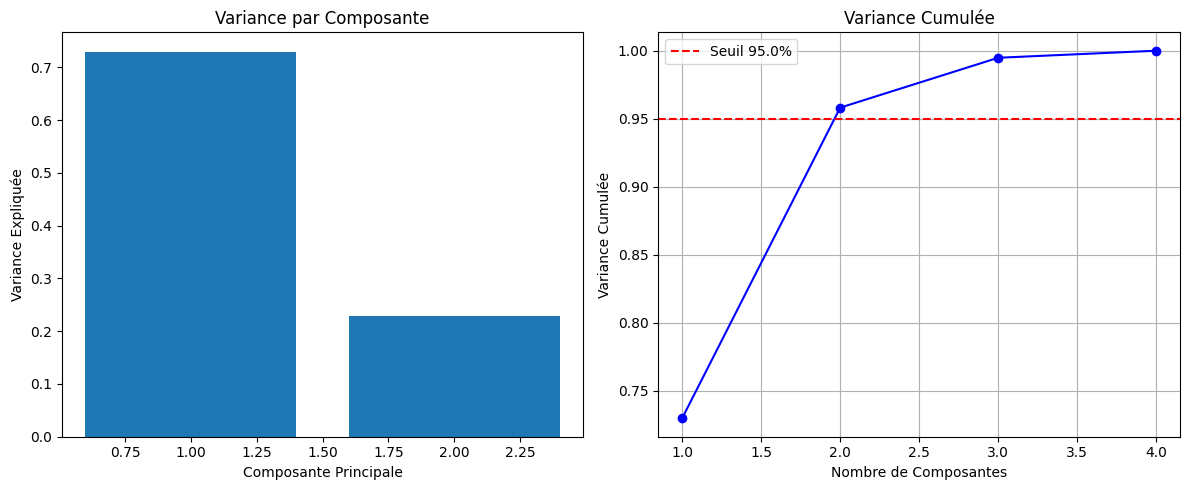

In [32]:
from sklearn.decomposition import PCA

def implementer_pca(df, variance_threshold=0.95):
    print("=== IMPLÉMENTATION PCA ===")
    
    # Standardisation
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df)
    
    # PCA avec toutes les composantes
    pca_full = PCA()
    pca_full.fit(X_scaled)
    
    # Déterminer nombre de composantes pour variance souhaitée
    cumsum_variance = np.cumsum(pca_full.explained_variance_ratio_)
    n_components = np.argmax(cumsum_variance >= variance_threshold) + 1
    
    print(f"Composantes nécessaires pour {variance_threshold*100}% variance: {n_components}")
    
    # PCA final
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    
    # Visualisation variance expliquée
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), 
            pca.explained_variance_ratio_)
    plt.xlabel('Composante Principale')
    plt.ylabel('Variance Expliquée')
    plt.title('Variance par Composante')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(cumsum_variance) + 1), cumsum_variance, 'bo-')
    plt.axhline(y=variance_threshold, color='r', linestyle='--', 
                label=f'Seuil {variance_threshold*100}%')
    plt.xlabel('Nombre de Composantes')
    plt.ylabel('Variance Cumulée')
    plt.title('Variance Cumulée')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return X_pca, pca, scaler

# Exécuter
X_pca, pca_model, scaler = implementer_pca(df)

## **ÉTAPE 6 : VISUALISATIONS**

### **Visualisations essentielles :**

=== VISUALISATIONS CLUSTERING ===


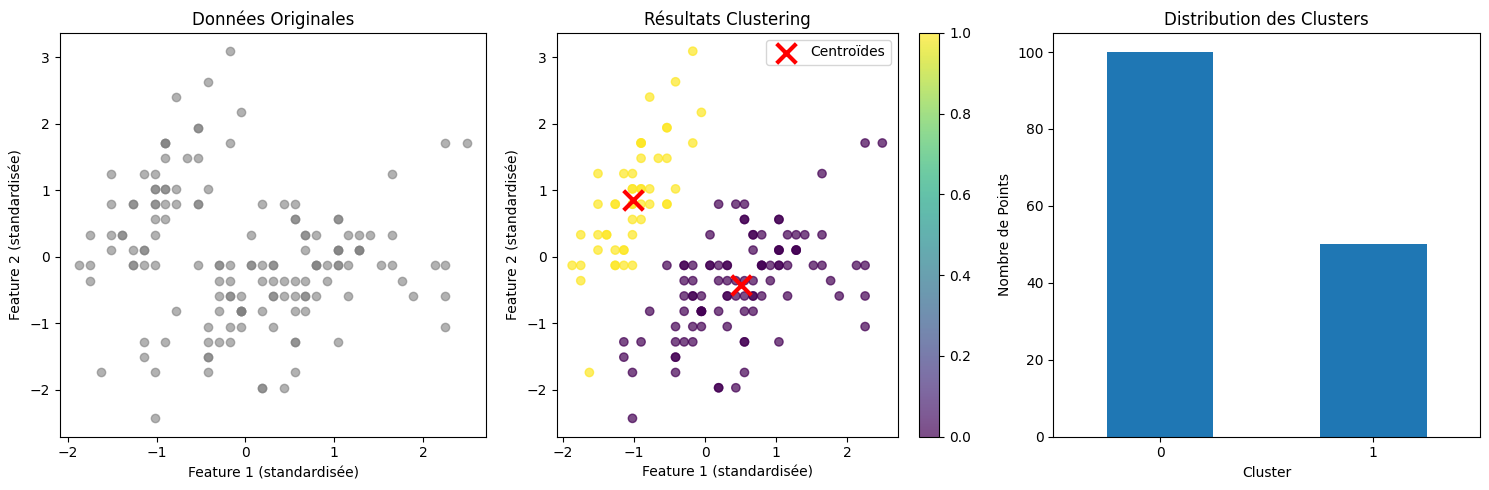

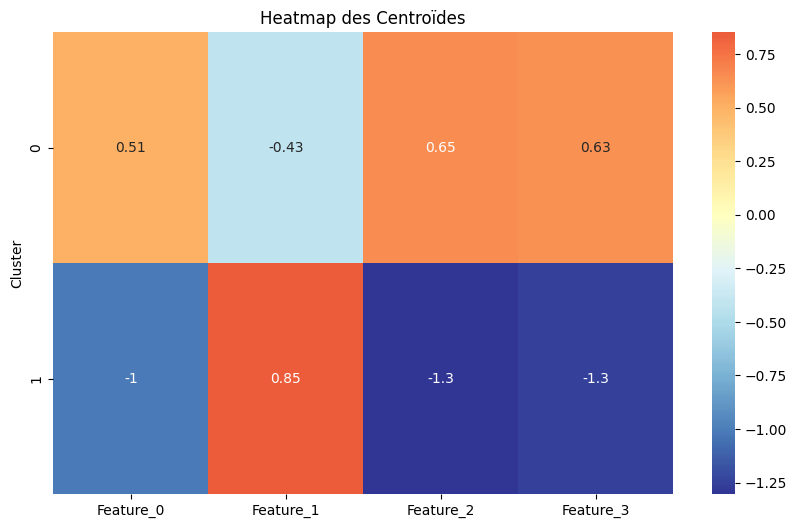

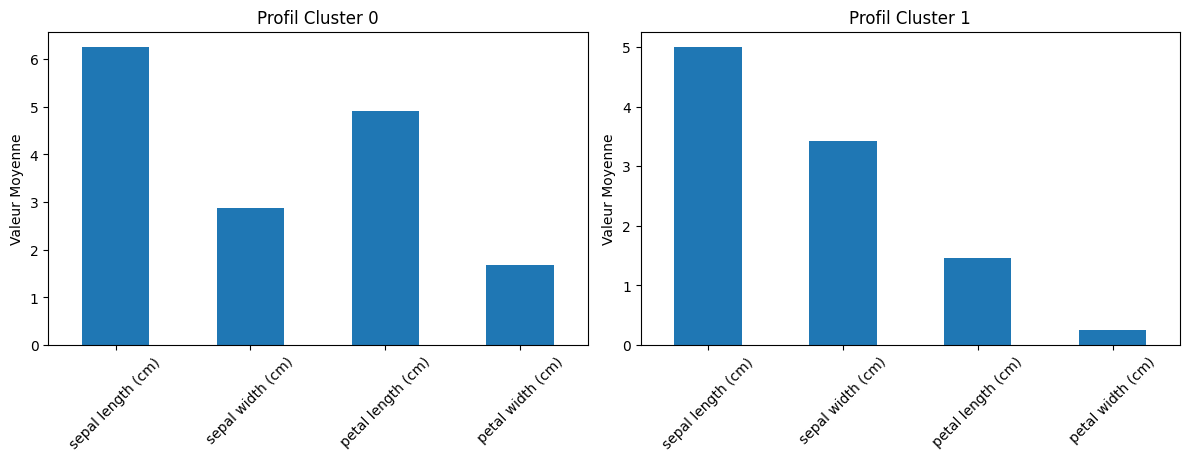

In [33]:
def visualiser_resultats_clustering(df_clustered, X_scaled, model):
    print("=== VISUALISATIONS CLUSTERING ===")
    
    # 1. Scatter plot des clusters (2D)
    if X_scaled.shape[1] >= 2:
        plt.figure(figsize=(15, 5))
        
        # Subplot 1: Données originales
        plt.subplot(1, 3, 1)
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='gray', alpha=0.6)
        plt.title('Données Originales')
        plt.xlabel('Feature 1 (standardisée)')
        plt.ylabel('Feature 2 (standardisée)')
        
        # Subplot 2: Clusters colorés
        plt.subplot(1, 3, 2)
        scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], 
                            c=df_clustered['Cluster'], cmap='viridis', alpha=0.7)
        plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], 
                   c='red', marker='x', s=200, linewidths=3, label='Centroïdes')
        plt.title('Résultats Clustering')
        plt.xlabel('Feature 1 (standardisée)')
        plt.ylabel('Feature 2 (standardisée)')
        plt.legend()
        plt.colorbar(scatter)
        
        # Subplot 3: Distribution des clusters
        plt.subplot(1, 3, 3)
        df_clustered['Cluster'].value_counts().sort_index().plot(kind='bar')
        plt.title('Distribution des Clusters')
        plt.xlabel('Cluster')
        plt.ylabel('Nombre de Points')
        plt.xticks(rotation=0)
        
        plt.tight_layout()
        plt.show()
    
    # 2. Heatmap des centroïdes
    centroids_df = pd.DataFrame(model.cluster_centers_, 
                               columns=[f'Feature_{i}' for i in range(model.cluster_centers_.shape[1])])
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(centroids_df, annot=True, cmap='RdYlBu_r', center=0)
    plt.title('Heatmap des Centroïdes')
    plt.ylabel('Cluster')
    plt.show()
    
    # 3. Profil des clusters
    cluster_profiles = df_clustered.groupby('Cluster').mean()
    
    plt.figure(figsize=(12, 8))
    for i, cluster in enumerate(cluster_profiles.index):
        plt.subplot(2, 2, i+1)
        cluster_profiles.loc[cluster].plot(kind='bar')
        plt.title(f'Profil Cluster {cluster}')
        plt.xticks(rotation=45)
        plt.ylabel('Valeur Moyenne')
    
    plt.tight_layout()
    plt.show()

def visualiser_pca(X_original, X_pca, pca_model):
    print("=== VISUALISATIONS PCA ===")
    
    # 1. Projection 2D
    if X_pca.shape[1] >= 2:
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 2, 1)
        plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
        plt.xlabel(f'PC1 ({pca_model.explained_variance_ratio_[0]:.1%} variance)')
        plt.ylabel(f'PC2 ({pca_model.explained_variance_ratio_[1]:.1%} variance)')
        plt.title('Projection PCA 2D')
        plt.grid(True)
        
        # 2. Biplot (si applicable)
        plt.subplot(1, 2, 2)
        for i, (pc1, pc2) in enumerate(pca_model.components_[:2].T):
            plt.arrow(0, 0, pc1, pc2, head_width=0.05, head_length=0.05, 
                     fc='red', ec='red')
            plt.text(pc1*1.1, pc2*1.1, f'Var{i+1}', fontsize=10)
        
        plt.xlim(-1, 1)
        plt.ylim(-1, 1)
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.title('Biplot PCA')
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()

# Exécuter visualisations
visualiser_resultats_clustering(df_clustered, X_scaled, model)

## **ÉTAPE 7 : ÉVALUATION DU MODÈLE**

### **Métriques d'évaluation :**

=== ÉVALUATION CLUSTERING ===
Score de Silhouette Moyen: 0.582
Interprétation:
  ✅ Excellent clustering

Inertia (WCSS): 222.36
Plus faible = meilleur clustering


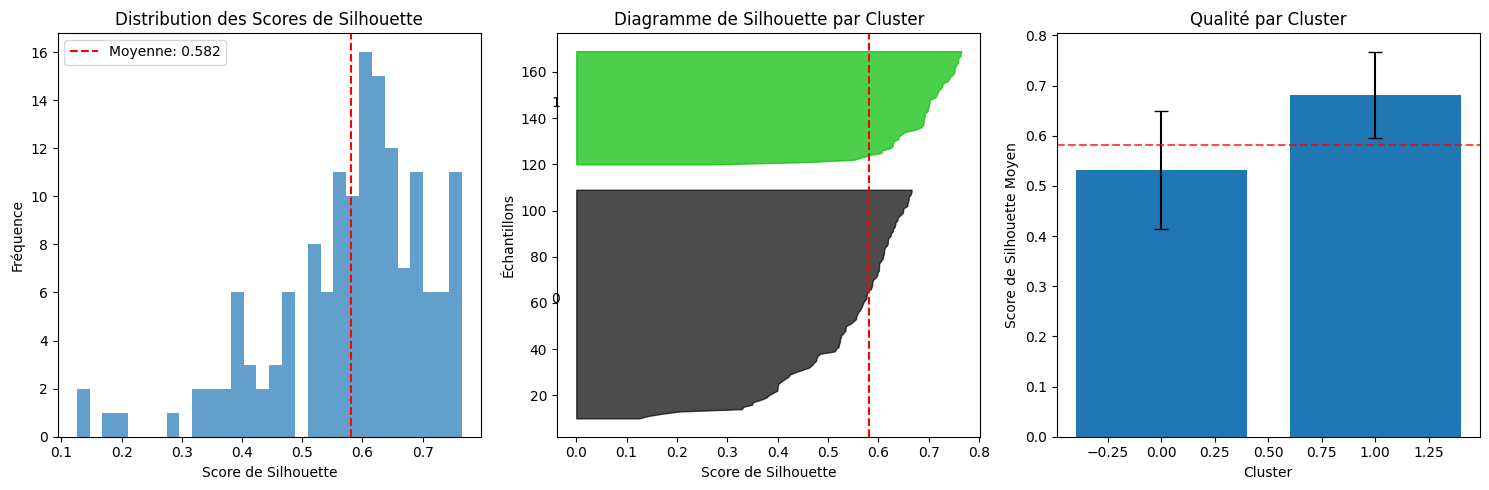

=== ÉVALUATION PCA ===
Variance expliquée par composante:
  PC1: 73.0%
  PC2: 22.9%

Variance totale conservée: 95.8%
Erreur de reconstruction (MSE): 0.0419

Shape des composantes: (2, 4)


In [34]:
def evaluer_clustering(X_scaled, labels, model=None):
    print("=== ÉVALUATION CLUSTERING ===")
    
    # 1. Score de Silhouette
    silhouette_avg = silhouette_score(X_scaled, labels)
    print(f"Score de Silhouette Moyen: {silhouette_avg:.3f}")
    print("Interprétation:")
    if silhouette_avg > 0.5:
        print("  ✅ Excellent clustering")
    elif silhouette_avg > 0.3:
        print("  ⚠️ Clustering acceptable")
    else:
        print("  ❌ Clustering faible")
    
    # 2. Inertia (pour K-means)
    if model and hasattr(model, 'inertia_'):
        print(f"\nInertia (WCSS): {model.inertia_:.2f}")
        print("Plus faible = meilleur clustering")
    
    # 3. Silhouette par échantillon
    from sklearn.metrics import silhouette_samples
    silhouette_vals = silhouette_samples(X_scaled, labels)
    
    plt.figure(figsize=(15, 5))
    
    # Subplot 1: Histogramme des scores de silhouette
    plt.subplot(1, 3, 1)
    plt.hist(silhouette_vals, bins=30, alpha=0.7)
    plt.axvline(silhouette_avg, color='red', linestyle='--', 
                label=f'Moyenne: {silhouette_avg:.3f}')
    plt.xlabel('Score de Silhouette')
    plt.ylabel('Fréquence')
    plt.title('Distribution des Scores de Silhouette')
    plt.legend()
    
    # Subplot 2: Diagramme de silhouette
    plt.subplot(1, 3, 2)
    y_lower = 10
    for i in range(len(np.unique(labels))):
        cluster_silhouette_vals = silhouette_vals[labels == i]
        cluster_silhouette_vals.sort()
        
        size_cluster_i = cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.nipy_spectral(float(i) / len(np.unique(labels)))
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals,
                         facecolor=color, edgecolor=color, alpha=0.7)
        
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    
    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.xlabel('Score de Silhouette')
    plt.ylabel('Échantillons')
    plt.title('Diagramme de Silhouette par Cluster')
    
    # Subplot 3: Statistiques par cluster
    plt.subplot(1, 3, 3)
    cluster_stats = []
    for i in range(len(np.unique(labels))):
        cluster_silhouette = silhouette_vals[labels == i]
        cluster_stats.append({
            'Cluster': i,
            'Taille': len(cluster_silhouette),
            'Silhouette_Moy': cluster_silhouette.mean(),
            'Silhouette_Std': cluster_silhouette.std()
        })
    
    stats_df = pd.DataFrame(cluster_stats)
    bars = plt.bar(stats_df['Cluster'], stats_df['Silhouette_Moy'], 
                   yerr=stats_df['Silhouette_Std'], capsize=5)
    plt.axhline(silhouette_avg, color='red', linestyle='--', alpha=0.7)
    plt.xlabel('Cluster')
    plt.ylabel('Score de Silhouette Moyen')
    plt.title('Qualité par Cluster')
    
    plt.tight_layout()
    plt.show()
    
    return stats_df

def evaluer_pca(pca_model, X_original):
    print("=== ÉVALUATION PCA ===")
    
    # 1. Variance expliquée
    print("Variance expliquée par composante:")
    for i, var_exp in enumerate(pca_model.explained_variance_ratio_):
        print(f"  PC{i+1}: {var_exp:.1%}")
    
    total_variance = sum(pca_model.explained_variance_ratio_)
    print(f"\nVariance totale conservée: {total_variance:.1%}")
    
    # 2. Reconstruction error
    X_reconstructed = pca_model.inverse_transform(pca_model.transform(X_original))
    reconstruction_error = np.mean((X_original - X_reconstructed) ** 2)
    print(f"Erreur de reconstruction (MSE): {reconstruction_error:.4f}")
    
    # 3. Composantes principales
    print(f"\nShape des composantes: {pca_model.components_.shape}")
    
    return {
        'variance_explained': pca_model.explained_variance_ratio_,
        'reconstruction_error': reconstruction_error,
        'components': pca_model.components_
    }

# Exécuter évaluations
stats_clustering = evaluer_clustering(X_scaled, df_clustered['Cluster'], model)
pca_metrics = evaluer_pca(pca_model, X_scaled)

## **ÉTAPE 8 : EXPLICATION À VOIX HAUTE**

### **Template d'explication :**

In [36]:
def expliquer_a_voix_haute_kmeans():
    """
    Script pour explication orale complète
    """
    print("🎤 EXPLICATION À VOIX HAUTE - K-MEANS")
    print("="*50)
    
    print("\n1️⃣ LES HYPOTHÈSES:")
    print("   💭 'Je suppose que mes données forment des groupes sphériques'")
    print("   💭 'Je suppose que tous les clusters ont une taille similaire'")
    print("   💭 'Je suppose que les features ont la même importance'")
    print("   💭 'Je suppose que je connais approximativement le nombre de groupes'")
    
    print("\n2️⃣ CE QUI SE PASSE MATHÉMATIQUEMENT:")
    print("   🧮 'L'algorithme calcule la distance euclidienne entre chaque point et les centroïdes'")
    print("   🧮 'Il minimise la somme des carrés des distances intra-cluster'")
    print("   🧮 'La formule J = Σ||x - μi||² cherche à rendre J le plus petit possible'")
    print("   🧮 'Chaque itération recalcule μi = moyenne des points du cluster i'")
    
    print("\n3️⃣ L'IDÉE ALGORITHMIQUE:")
    print("   🔄 'Étape 1: Je place k points aléatoirement comme centroïdes initiaux'")
    print("   🔄 'Étape 2: J'assigne chaque point au centroïde le plus proche'")
    print("   🔄 'Étape 3: Je recalcule la position des centroïdes au centre de leurs points'")
    print("   🔄 'Étape 4: Je répète 2-3 jusqu'à ce que les centroïdes ne bougent plus'")
    print("   🔄 'L'algorithme converge vers un minimum local de la fonction de coût'")
    
    print("\n4️⃣ INTERPRÉTATION DES RÉSULTATS:")
    print("   📊 'Un score de silhouette > 0.5 indique des clusters bien séparés'")
    print("   📊 'L'inertia me dit à quel point les points sont proches de leurs centroïdes'")
    print("   📊 'La méthode du coude m'aide à choisir le bon nombre de clusters'")
    
    print("\n5️⃣ LIMITES ET PRÉCAUTIONS:")
    print("   ⚠️ 'K-means peut échouer sur des formes non-sphériques'")
    print("   ⚠️ 'L'initialisation aléatoire peut donner des résultats différents'")
    print("   ⚠️ 'Il faut standardiser les données si les échelles diffèrent'")
    print("   ⚠️ 'L'algorithme est sensible aux outliers'")
    
    return "Explication terminée ! 🎯"

# Adapter pour d'autres algorithmes
def expliquer_a_voix_haute_pca():
    print("🎤 EXPLICATION À VOIX HAUTE - PCA")
    print("="*50)
    
    print("\n1️⃣ LES HYPOTHÈSES:")
    print("   💭 'Je suppose que la variance capture l'information importante'")
    print("   💭 'Je suppose que les relations sont linéaires'")
    print("   💭 'Je suppose que les features sont corrélées'")
    
    print("\n2️⃣ CE QUI SE PASSE MATHÉMATIQUEMENT:")
    print("   🧮 'PCA trouve les directions de variance maximale dans les données'")